In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [17]:
frame = cv.imread("./video2/frame655.jpg", cv.IMREAD_COLOR)

In [18]:
cv.imshow("frame", frame)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
frameRecortado = frame[390:700, 600:900]

In [21]:
cv.imshow("frame", frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()

In [30]:
frameRecortado.shape

(310, 300, 3)

In [22]:
frameRecortadoBN = cv.cvtColor(frameRecortado, cv.COLOR_BGR2GRAY)

In [23]:
cv.imshow("frame", frameRecortadoBN)
cv.waitKey(0)
cv.destroyAllWindows()

In [33]:
frameRecortadoBN.shape

(310, 300)

In [34]:
frameRecortadoBN

array([[126, 125, 125, ..., 150, 150, 150],
       [126, 125, 125, ..., 150, 150, 150],
       [125, 125, 125, ..., 149, 149, 149],
       ...,
       [137, 137, 137, ..., 152, 152, 152],
       [137, 137, 138, ..., 151, 152, 151],
       [138, 138, 138, ..., 152, 152, 152]], dtype=uint8)

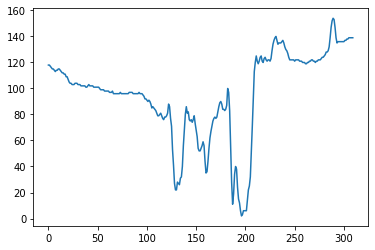

In [36]:
plt.plot(frameRecortadoBN[:,150])
plt.show()

In [37]:
frameRecortadoBN[:,150]

array([118, 118, 117, 116, 115, 115, 114, 113, 114, 114, 115, 115, 114,
       113, 112, 112, 111, 111, 109, 109, 107, 105, 104, 104, 103, 103,
       103, 104, 104, 104, 103, 103, 103, 102, 102, 102, 102, 102, 101,
       101, 102, 103, 102, 102, 102, 102, 101, 101, 101, 101, 101, 101,
       100,  99,  99,  99,  99,  98,  98,  98,  98,  98,  97,  97,  97,
        98,  96,  96,  96,  96,  96,  96,  96,  97,  96,  96,  96,  96,
        96,  96,  96,  96,  97,  97,  97,  97,  96,  96,  96,  96,  96,
        96,  97,  96,  96,  96,  95,  94,  92,  92,  91,  90,  91,  90,
        88,  85,  86,  85,  84,  83,  81,  79,  79,  80,  81,  79,  77,
        76,  78,  78,  79,  81,  88,  86,  77,  71,  53,  41,  27,  22,
        22,  28,  27,  26,  31,  32,  40,  56,  68,  80,  86,  81,  82,
        76,  75,  76,  74,  76,  79,  73,  68,  63,  54,  52,  52,  54,
        56,  59,  56,  44,  35,  36,  44,  54,  62,  67,  71,  75,  77,
        78,  77,  78,  82,  86,  89,  90,  88,  84,  84,  83,  8

In [116]:
frameRecortado1 = frame[350:810, 600:1200]
#aproximadamente 160 frames de radio 810-350

In [117]:
cv.imshow("frame", frameRecortado1)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
def intensidadRegion(nombreVideo, imagenInicial, imagenFinal):
    cantidadImagenes = imagenFinal-imagenInicial
    # El primer arreglo sera de ceros, este es par aguardar todos los perfiles de itnensidades
    intensidadesTodosFrames = np.zeros(310)
    for i in range(imagenInicial, imagenFinal):
        # Se carga el frame
        frame = cv.imread("./%s/frame%d.jpg" % (nombreVideo, i), 0)
        # Se recorta el frame
        frame = np.array(frame[390:700, 600:900])
        # Se crea arreglo dummy para guardar el perfil de intensidad de cada frame en cada iteracion
        intensidades = frame[:,150]
        # Se stackea el arreglo dummy en uno que guardara todos los  perfiles de intensidades
        intensidadesTodosFrames = np.vstack([intensidadesTodosFrames, intensidades])
    # Se elimina el primer arreglo de ceros, y se devuelve un arreglo con todos los perfiles de itnensidades
    tiempo = np.linspace(0, cantidadImagenes/30, cantidadImagenes)
    return intensidadesTodosFrames[1:,:], tiempo

In [4]:
perfilesIntensidades, t = intensidadRegion("video2", 555, 655)

In [43]:
perfilesIntensidades

array([[200., 200., 200., ..., 179., 178., 179.],
       [199., 200., 201., ..., 179., 178., 178.],
       [201., 201., 201., ..., 180., 180., 180.],
       ...,
       [117., 116., 114., ..., 140., 140., 141.],
       [118., 117., 116., ..., 139., 140., 140.],
       [118., 118., 117., ..., 139., 139., 140.]])

In [32]:
perfilesIntensidades[99]

array([118., 118., 117., 116., 115., 114., 114., 113., 113., 114., 112.,
       112., 112., 112., 111., 111., 111., 111., 110., 108., 105., 104.,
       104., 103., 103., 103., 103., 104., 104., 104., 103., 103., 103.,
       102., 102., 102., 102., 102., 101., 101., 102., 103., 102., 102.,
       102., 101., 101., 101., 101., 100., 101., 101., 100., 100., 100.,
        99.,  98.,  98.,  98.,  98.,  98.,  98.,  97.,  97.,  97.,  97.,
        96.,  96.,  96.,  96.,  96.,  96.,  96.,  97.,  95.,  96.,  96.,
        95.,  95.,  95.,  95.,  96.,  97.,  97.,  97.,  97.,  97.,  97.,
        97.,  97.,  97.,  97.,  97.,  97.,  97.,  97.,  97.,  97.,  95.,
        95.,  94.,  93.,  92.,  92.,  91.,  91.,  89.,  87.,  86.,  85.,
        82.,  79.,  79.,  80.,  80.,  78.,  78.,  79.,  80.,  82.,  85.,
        86.,  91.,  87.,  77.,  70.,  57.,  38.,  24.,  17.,  12.,  18.,
        28.,  29.,  29.,  33.,  39.,  50.,  66.,  80.,  91.,  90.,  84.,
        78.,  73.,  72.,  75.,  78.,  74.,  69.,  6

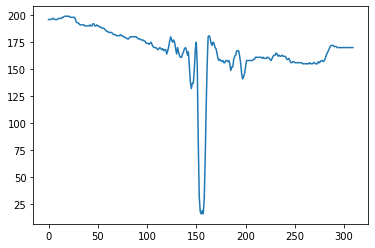

In [44]:
plt.plot(perfilesIntensidades[49])
plt.show()

In [36]:
arregloDiametros = np.array([])
for perfilIntensidad in perfilesIntensidades:
    numeroFrames = 0
    for intensidad in perfilIntensidad:
        # hay que hacer un condicional sobre cada intensidad, establecer un threshold, y guardar el numero de frames cuya intensidad  menores a ese threshold, a ojo el threshold que establece esta entre 150 y 160
        if(intensidad<=180):
            numeroFrames = numeroFrames + 1

    arregloDiametros = np.append(arregloDiametros, numeroFrames)
    arregloRadios = arregloDiametros/2
    arregloRadiosMetros = arregloRadios * 0.15 / 743  #factor de conversion

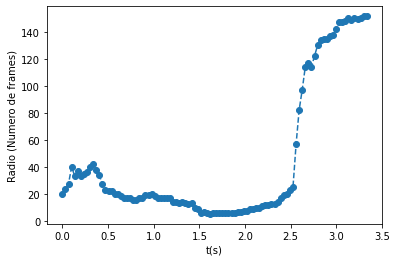

In [34]:
plt.plot(t, arregloRadios, 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (Numero de frames)')
plt.show()

In [37]:
arregloRadios[0:31]

array([ 36. ,  41. ,  51.5,  68.5,  47.5,  53.5,  56.5,  70. ,  74.5,
        76.5,  80. ,  85.5,  86. ,  86.5,  91.5,  92. ,  91.5,  86. ,
       107. , 110. , 112. , 112. , 114. , 114.5, 113.5, 108. , 107. ,
       109. , 114. , 107.5, 108.5])

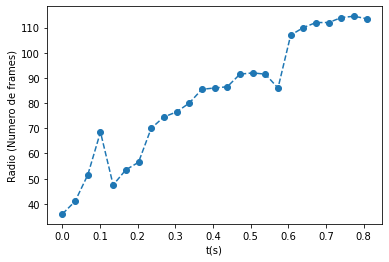

In [56]:
plt.plot(t[0:25], arregloRadios[0:25], 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (Numero de frames)')
plt.show()

In [14]:
data = np.array([arregloRadiosMetros,arregloRadios, t]).T
df = pd.DataFrame(data, columns=['radios(metros)','radios(pixeles)', 'tiempo'])

In [15]:
df.to_csv("video2.csv")

In [16]:
df

,radios(metros),radios(pixeles),tiempo
0,0.007268,36.0,0.000000
1,0.008277,41.0,0.033670
2,0.010397,51.5,0.067340
3,0.013829,68.5,0.101010
4,0.009590,47.5,0.134680
...,...,...,...
95,0.031292,155.0,3.198653
96,0.031292,155.0,3.232323
97,0.031292,155.0,3.265993
98,0.031292,155.0,3.299663


In [31]:
frame = cv.imread("./video2/frame655.jpg", 0)
frameRecortado = frame[390:695, 600:910]
cv.circle(frameRecortado,(155,150), int(arregloRadios[99]),(255,0,255),1)
cv.line(frameRecortado,(155,0),(155,570), (255, 0,255), 1)
cv.imshow('imagen',frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()